# Data Science Salaries - EDA & Linear Regression 

[Data & Description Source](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download)

**Column Description**
- work_year: The year the salary was paid. <br>
- experience_level: The experience level in the job during the year with the following possible values: <br>
    1. EN = Entry-level / Junior <br>
    2. MI = Mid-level / Intermediate <br>
    3. SE = Senior-level / Expert <br>
    4. EX = Executive-level / Director <br>
- employment_type: The type of employement for the role: <br>
    1. PT = Part-time <br> 
    2. FT = Full-time <br> 
    3. CT = Contract <br>
    4. FL = Freelance <br>
- job_title: The role worked in during the year.<br>
- salary: The total gross salary amount paid.<br>
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.<br>
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com.<br>
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code. <br>
- remote_ratio: The overall amount of work done remotely, possible values are as follows: <br>
    1. 0 = No remote work (less than 20%) <br>
    2. 50 = Partially remote <br>
    3. 100 = Fully remote (more than 80%) <br>
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code. <br>
- company_size: The average number of people that worked for the company during the year: <br>
    1. S = less than 50 employees (small) <br>
    2. M = 50 to 250 employees (medium) <br>
    3. L = more than 250 employees (large) <br>

## Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import re

# For modeling
from sklearn.model_selection import train_test_split

# Scaling numeric column(s)
from sklearn.preprocessing import StandardScaler 

# Data pre-processing of categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# For Linear Regression in Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Cross Validation
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Importing data

In [2]:
raw_salaries = pd.read_csv('ds_salaries.csv')

In [3]:
raw_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Exploratory data analysis

In [4]:
raw_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
raw_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
raw_salaries.loc[raw_salaries.employee_residence!=raw_salaries.company_location]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
17,17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
19,19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US,M
32,32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
40,40,2020,MI,FT,Data Scientist,45760,USD,45760,PH,100,US,S
53,53,2020,EN,FT,Data Engineer,48000,EUR,54742,PK,100,DE,L
54,54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S
61,61,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
70,70,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
73,73,2021,EX,FT,BI Data Analyst,150000,USD,150000,IN,100,US,L
82,82,2021,MI,FT,Applied Data Scientist,68000,CAD,54238,GB,50,CA,L


In [7]:
raw_salaries.corr()

<ipython-input-7-16f10e00da10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_salaries.corr()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


In [8]:
# Removing columns that don't seem useful. Salary is the same column as salary_in_usd but without currency conversion
sal = raw_salaries.drop(columns=['Unnamed: 0', 'salary']) # Dataset with columns needed for use

In [9]:
sal.corr()

<ipython-input-9-4ccc96e3b50d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sal.corr()


,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


### Analysis of individual columns

#### Unique values in categorical columns

In [16]:
def pretty_print_unique_values(df, columns):
    for column in columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {', '.join(str(value) for value in unique_values)}")
        print()
        
categorical_cols = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', \
                    'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Assuming your DataFrame is named 'df' and you have a list of columns 'columns'
pretty_print_unique_values(sal, categorical_cols)

Column: work_year
Unique Values: 2020, 2021, 2022

Column: experience_level
Unique Values: MI, SE, EN, EX

Column: employment_type
Unique Values: FT, CT, PT, FL

Column: job_title
Unique Values: Data Scientist, Machine Learning Scientist, Big Data Engineer, Product Data Analyst, Machine Learning Engineer, Data Analyst, Lead Data Scientist, Business Data Analyst, Lead Data Engineer, Lead Data Analyst, Data Engineer, Data Science Consultant, BI Data Analyst, Director of Data Science, Research Scientist, Machine Learning Manager, Data Engineering Manager, Machine Learning Infrastructure Engineer, ML Engineer, AI Scientist, Computer Vision Engineer, Principal Data Scientist, Data Science Manager, Head of Data, 3D Computer Vision Researcher, Data Analytics Engineer, Applied Data Scientist, Marketing Data Analyst, Cloud Data Engineer, Financial Data Analyst, Computer Vision Software Engineer, Director of Data Engineering, Data Science Engineer, Principal Data Engineer, Machine Learning Devel

1. Distribution of exeprience level in data

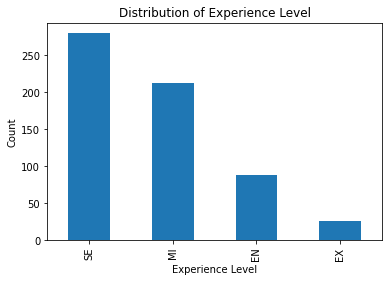

In [18]:
category_counts = sal['experience_level'].value_counts()

# Plotting the count graph
category_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Level')

# Display the graph
plt.show()


2. Experience Level x Salary (USD) relationship <br>

I am curious about the distribution of salaries (in usd) across all experience levels. My hypothesis is that mean and median salary of employees at higher experience level should be higher.


Text(0.5, 1.0, 'Salary (in USD) by experience level')

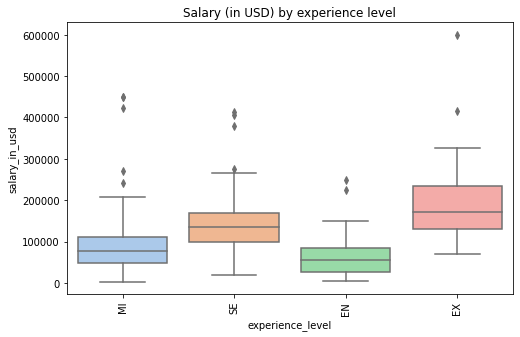

In [106]:
plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level',y='salary_in_usd',data=sal, palette='pastel')
plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
plt.title("Salary (in USD) by experience level")

The above plot shows median salaries increasing as experience level increases. We also see some overlap between third quartile of prior designations and first quartile of subsequent designations such as between EN & MI, MI & SE, SE & EX repectively. These must be high performing individuals in a band or those due for promotion into the next band. Let's also look at mean salary for each experience level band.

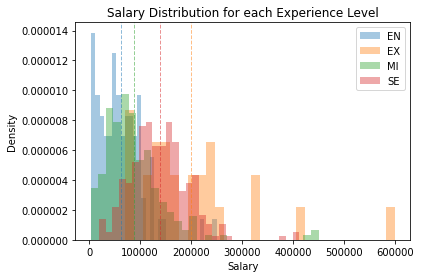

In [83]:
# Group the data by experience level
grouped_data = sal.groupby('experience_level')

# Calculate statistics
experience_stats = grouped_data['salary_in_usd'].agg(['mean', 'std'])

# Plot the distributions
for experience, stats in experience_stats.iterrows():
    mean = stats['mean']
    std = stats['std']
    salary_values = sal[sal['experience_level'] == experience]['salary_in_usd']
    
    # Assigning a colour to each category; same colour for distribution and mean
    color = plt.cm.tab10(experience_stats.index.get_loc(experience))  # Assign a color to each category
    plt.hist(salary_values, bins=30, density=True, alpha=0.4, label=experience, color=color)
    plt.axvline(mean, color=color, linestyle='dashed', linewidth=1, alpha=0.5)  # Use the same color for the mean line
    
# Formatting the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')  # Display decimal numbers
    
plt.legend()
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution for each Experience Level')
plt.show()


As expected, the mean for lower experience bands is lower. 

3. Experience Level x Job Title relationship<br>
Next I wanted to check if job titles are related to the experience level i.e are job titles for different experience levels different. I re-iterated the below query for all experience levels and found out that certain job titles are present at all levels. 

In [40]:
sal.loc[sal['experience_level']=='EX'][['experience_level','job_title']]\
        .drop_duplicates().sort_values(by = ['experience_level']).reset_index().drop(columns=['index'])

,experience_level,job_title
0,EX,Director of Data Science
1,EX,Data Engineering Manager
2,EX,BI Data Analyst
3,EX,Head of Data
4,EX,Head of Data Science
5,EX,Data Science Consultant
6,EX,Principal Data Scientist
7,EX,Principal Data Engineer
8,EX,Data Engineer
9,EX,Data Analyst


4. Job Title & Job Category relationship with Salary<br>

I want to look at different sides of job title. Since job titles are names created at the discretion of a company and have a lot values, I have also created a column called job_category where I bucket some similar job titles into one bucket. This new column can help in looking at a more concise level of data.

Below I will create the new column job_category by finding patterns in job_title column and compare them.

In [6]:
# Function to find the pattern and assign corresponding value
def find_pattern(text, patterns):
    text = text.lower()
    for pattern, value in patterns.items():
        match = re.findall(pattern, text)
        if match:
            return value
    return text

job_categories = {
    r'data engineer': 'data engineer',
    r'data analy': 'data analyst',
    r'data scien': 'data scientist',
    r'machine learning': 'machine learning',
    r'ml engineer': 'machine learning'
    
}

# Apply the function to the 'Text' column and assign the results to a new column 'NewColumn'
sal['job_category'] = sal['job_title'].apply(find_pattern, patterns=job_categories)

NameError: name 'sal' is not defined

In [104]:
sal['job_category'].unique()

array(['data scientist', 'machine learning', 'data engineer',
       'data analyst', 'research scientist', 'ai scientist',
       'computer vision engineer', 'head of data',
       '3d computer vision researcher',
       'computer vision software engineer', 'data specialist',
       'data architect', 'big data architect', 'analytics engineer',
       'etl developer', 'nlp engineer'], dtype=object)

In [117]:
sal['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

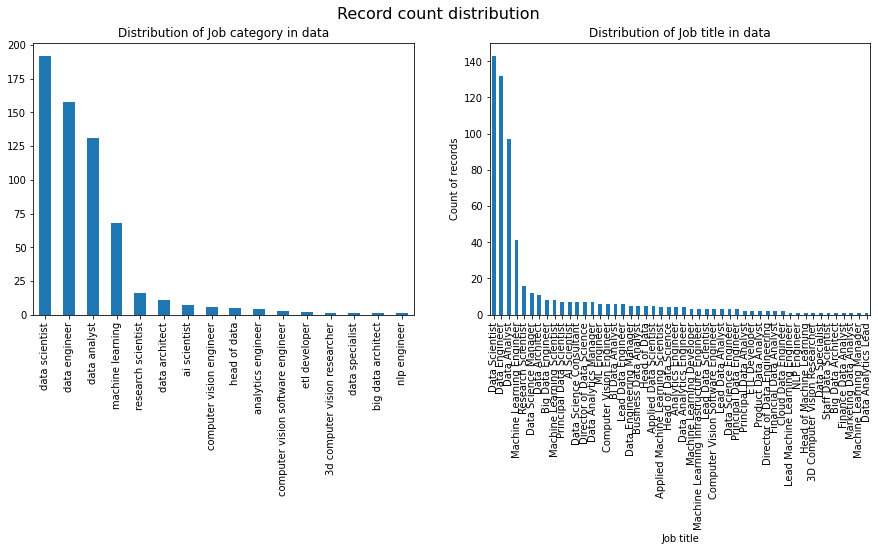

In [132]:
# Lets look at distribution of records across different job categories and job titles 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Job Category record count graph
category_counts = sal['job_category'].value_counts()
# Plotting the count graph
category_counts.plot(kind='bar', ax=axs[0])
# Adding labels and title
plt.xlabel('Job category')
plt.ylabel('Count of records')
axs[0].set_title('Distribution of Job category in data')


# Job Title record count graph
title_counts = sal['job_title'].value_counts()
# Plotting the count graph
title_counts.plot(kind='bar', ax=axs[1])
# Adding labels and title
plt.xlabel('Job title')
plt.ylabel('Count of records')
axs[1].set_title('Distribution of Job title in data')

# Set titles for both figures
fig.suptitle("Record count distribution", fontsize=16)

# Display the graph
plt.show()

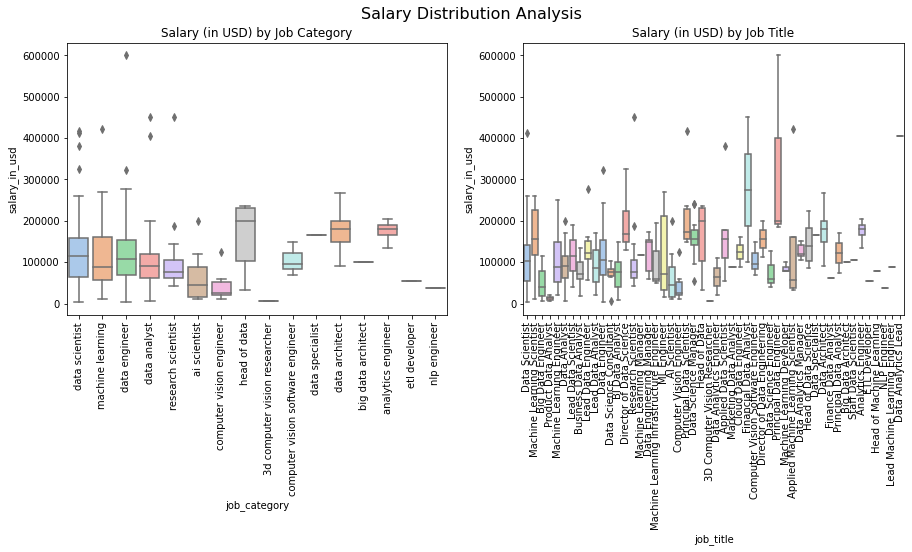

In [130]:
# Now let's look at the distribution of salary across each job title and job category
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Rotating all labels on X-axis by 90 degree
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Job Category x Salary distribution
sns.boxplot(x='job_category',y='salary_in_usd',data=sal, palette='pastel', ax=axs[0])
axs[0].set_title("Salary (in USD) by Job Category")

# Job Title x Salary distribution
sns.boxplot(x='job_title',y='salary_in_usd',data=sal, palette='pastel', ax=axs[1])
axs[1].set_title("Salary (in USD) by Job Title")

# Set titles for both figures
fig.suptitle("Salary Distribution Analysis", fontsize=16)

plt.show()

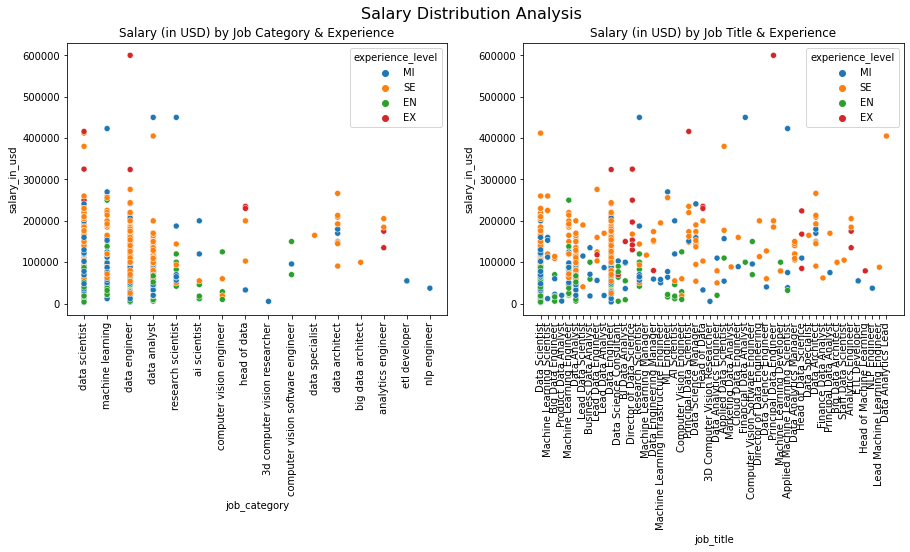

In [133]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Job Category x Experience x Salary
sns.scatterplot(data=sal, x="job_category", y="salary_in_usd", hue="experience_level", ax=axs[0])
axs[0].set_title("Salary (in USD) by Job Category & Experience")

# Job Title x Experience x Salary
sns.scatterplot(data=sal, x="job_title", y="salary_in_usd", hue="experience_level", ax=axs[1])
axs[1].set_title("Salary (in USD) by Job Title & Experience")

# Title for both plots
fig.suptitle("Salary Distribution Analysis", fontsize=16)

plt.show()

5. Employee residence and Company location

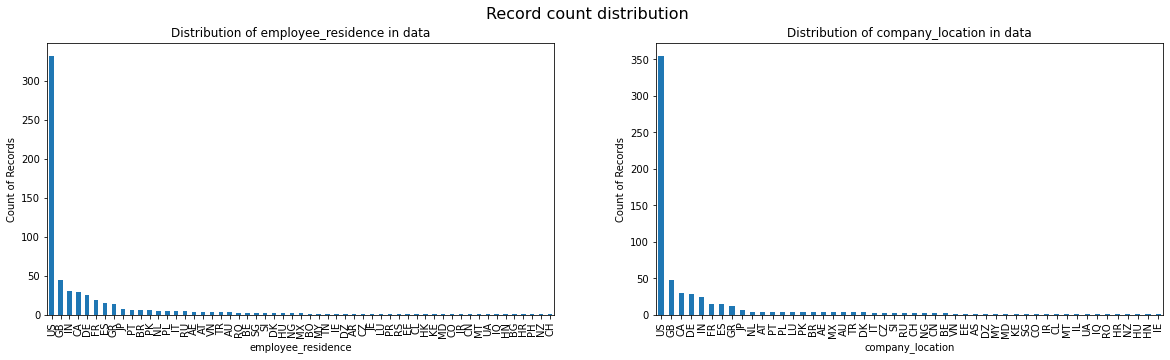

In [197]:
# Lets look at distribution of records across different job categories and job titles 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

for index, value in enumerate(['employee_residence', 'company_location']):
    # Rotating all labels on X-axis by 90 degree
    plt.setp(axs[index].xaxis.get_majorticklabels(), rotation=90)
    category_counts = sal[value].value_counts()
    # Plotting the count graph
    category_counts.plot(kind='bar', ax=axs[index])
    # Adding labels and title
    axs[index].set_xlabel(value)
    axs[index].set_ylabel('Count of Records')
    axs[index].set_title(f'Distribution of {value} in data')
    
# Set titles for both figures
fig.suptitle("Record count distribution", fontsize=16)

# Display the graph
plt.show()

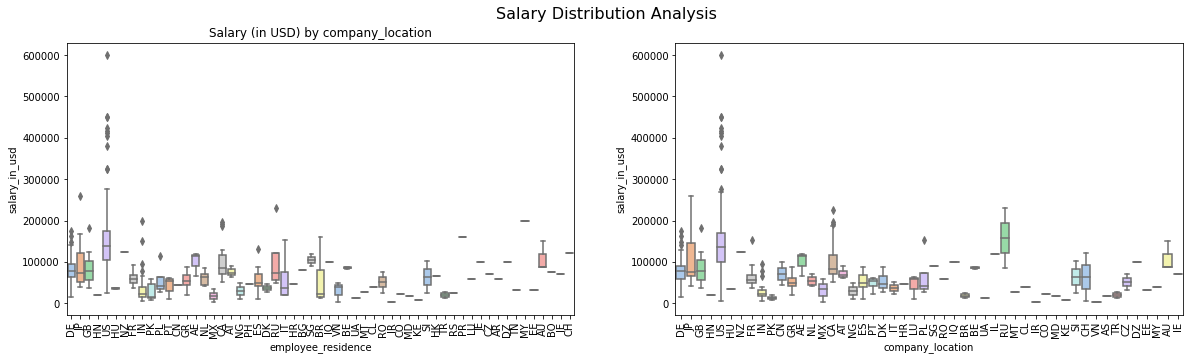

In [172]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

for index, value in enumerate(['employee_residence', 'company_location']):
    # Rotating all labels on X-axis by 90 degree
    plt.setp(axs[index].xaxis.get_majorticklabels(), rotation=90)
    # Job Category x Salary distribution
    sns.boxplot(x=value,y='salary_in_usd',data=sal, palette='pastel', ax=axs[index])
    axs[0].set_title(f"Salary (in USD) by {value}")
    
# Set titles for both figures
fig.suptitle("Salary Distribution Analysis", fontsize=16)

plt.show()

We can see that most countries in employee residence and company location do not have a lot of records. So I want to look at the ones which have more than at least 5 records to see more clear patterns

In [12]:
rec_counts = {}  # Initialize rec_counts as dictionary 

for index, value in enumerate(['employee_residence', 'company_location']):
    rec_counts[value] = sal[value].value_counts()
    rec_counts[value] = rec_counts[value].loc[rec_counts[value]>5]
    
for key, value in rec_counts.items():
    print(f"Category: {key}")
    for country, count in value.items():
        print(f"Country: {country}, Count: {count}")


Category: employee_residence
Country: US, Count: 332
Country: GB, Count: 44
Country: IN, Count: 30
Country: CA, Count: 29
Country: DE, Count: 25
Country: FR, Count: 18
Country: ES, Count: 15
Country: GR, Count: 13
Country: JP, Count: 7
Country: PT, Count: 6
Country: BR, Count: 6
Country: PK, Count: 6
Category: company_location
Country: US, Count: 355
Country: GB, Count: 47
Country: CA, Count: 30
Country: DE, Count: 28
Country: IN, Count: 24
Country: FR, Count: 15
Country: ES, Count: 14
Country: GR, Count: 11
Country: JP, Count: 6


In [13]:
emp_res_countries = list(rec_counts['employee_residence'].index)
comp_loc_countries = list(rec_counts['company_location'].index)

emp_res_data = sal[sal['employee_residence'].isin(emp_res_countries)]
comp_loc_data = sal[sal['company_location'].isin(comp_loc_countries)]

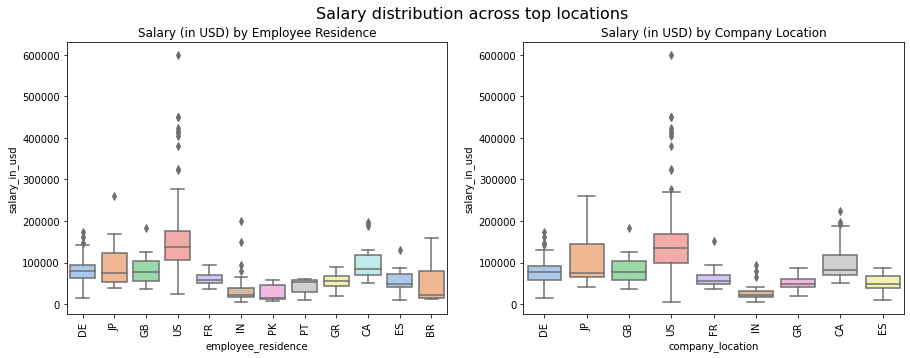

In [192]:
# Now let's look at the distribution of salary across each Employee Residence and Company Location
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Rotating all labels on X-axis by 90 degree
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Employee Residence x Salary distribution
sns.boxplot(x='employee_residence',y='salary_in_usd',data=emp_res_data, palette='pastel', ax=axs[0])
axs[0].set_title("Salary (in USD) by Employee Residence")

# Company Location x Salary distribution
sns.boxplot(x='company_location',y='salary_in_usd',data=comp_loc_data, palette='pastel', ax=axs[1])
axs[1].set_title("Salary (in USD) by Company Location")

# Set titles for both figures
fig.suptitle("Salary distribution across top locations", fontsize=16)

plt.show()

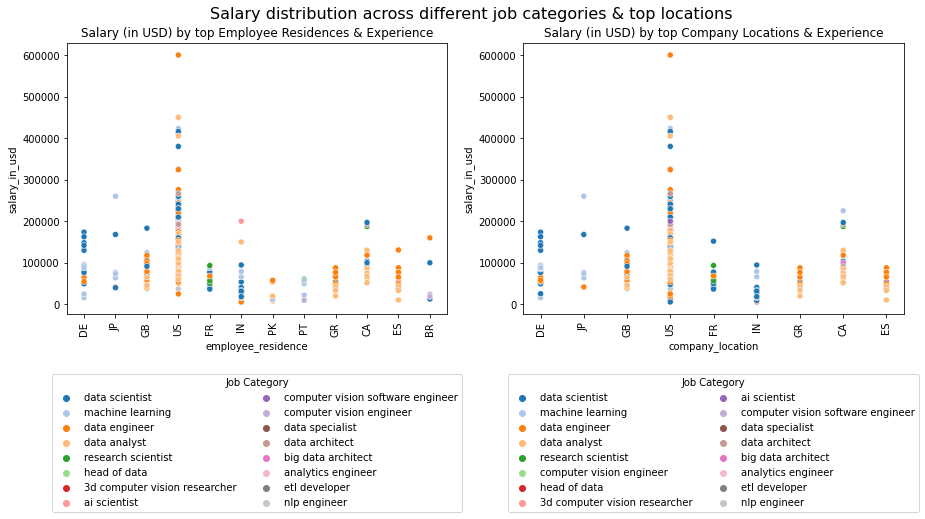

In [52]:
# A distinct color palette to make sure the top job categories are more distinct
# We need only one palatte here because only job categories are getting colour encoded
color_palette = sns.color_palette("tab20", len(emp_res_data['job_category'].unique()))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Top Employee Residence x Experience x Salary
sns.scatterplot(data=emp_res_data, x="employee_residence", y="salary_in_usd", hue="job_category", ax=axs[0], palette=color_palette)
axs[0].set_title("Salary (in USD) by top Employee Residences & Experience")
# Move the legend below the graph
axs[0].legend(title='Job Category', bbox_to_anchor=(0.5, -0.2), ncol=2, loc='upper center')

# Top Company Location x Experience x Salary
sns.scatterplot(data=comp_loc_data, x="company_location", y="salary_in_usd", hue="job_category", ax=axs[1], palette=color_palette)
axs[1].set_title("Salary (in USD) by top Company Locations & Experience")
# Move the legend below the graph
axs[1].legend(title='Job Category', bbox_to_anchor=(0.5, -0.2), ncol=2, loc='upper center')

# Title for both plots
fig.suptitle("Salary distribution across different job categories & top locations", fontsize=16)

plt.show()


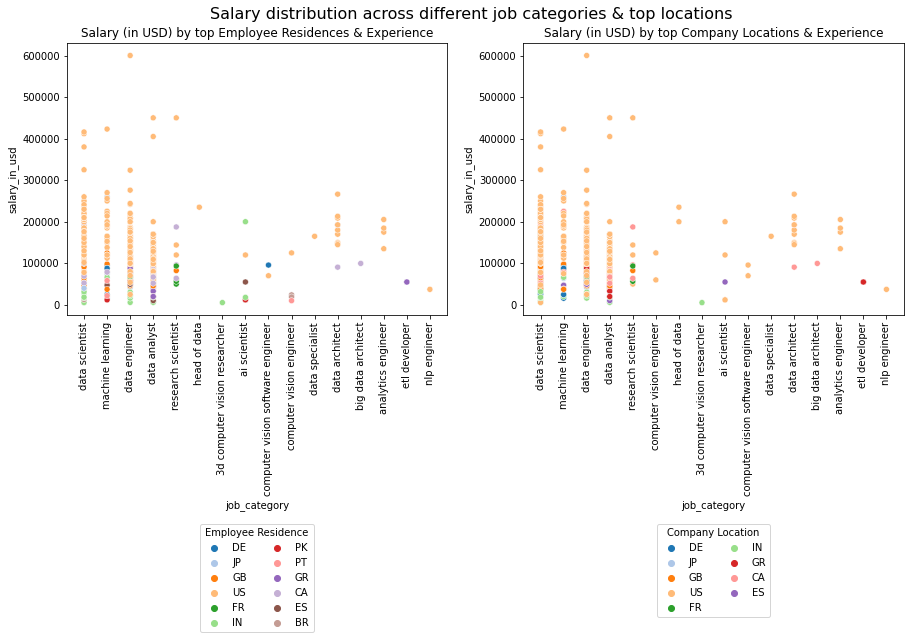

In [67]:
# A distinct color palette to make sure the top job categories are more distinct
# We need two palattes here: one for employee residence and another for company location
color_palette_empres = sns.color_palette("tab20", len(emp_res_data['employee_residence'].unique()))
color_palette_comploc = sns.color_palette("tab20", len(comp_loc_data['company_location'].unique()))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Top Employee Residence x Experience x Salary
sns.scatterplot(data=emp_res_data, x="job_category", y="salary_in_usd", hue="employee_residence", \
                ax=axs[0], palette=color_palette_empres)
axs[0].set_title("Salary (in USD) by top Employee Residences & Experience")
# Move the legend below the graph
axs[0].legend(title='Employee Residence', bbox_to_anchor=(0.5, -0.75), ncol=2, loc='upper center')

# Top Company Location x Experience x Salary
sns.scatterplot(data=comp_loc_data, x="job_category", y="salary_in_usd", hue="company_location", \
                ax=axs[1], palette=color_palette_comploc)
axs[1].set_title("Salary (in USD) by top Company Locations & Experience")
# Move the legend below the graph
axs[1].legend(title='Company Location', bbox_to_anchor=(0.5, -0.75), ncol=2, loc='upper center')

# Title for both plots
fig.suptitle("Salary distribution across different job categories & top locations", fontsize=16)

plt.show()


We observe highest salaries predominantly for Machine Learning, Data Engineering and Data Scientist experts across all locations. We also observe that US dominates the salaries across all job categories across all locations. 

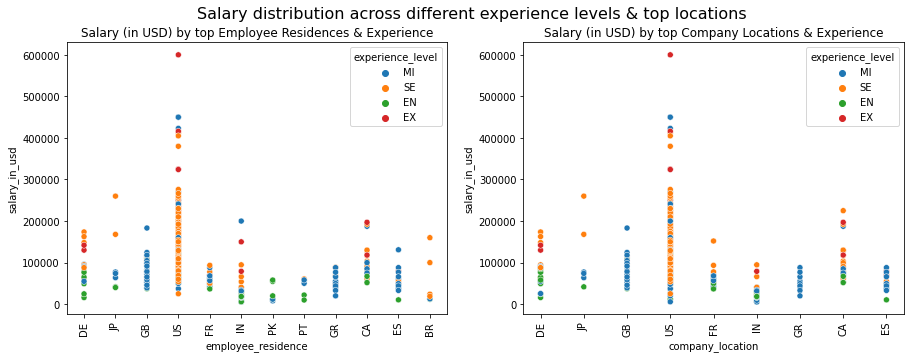

In [189]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Top Employee Residence x Experience x Salary
sns.scatterplot(data=emp_res_data, x="employee_residence", y="salary_in_usd", hue="experience_level", ax=axs[0])
axs[0].set_title("Salary (in USD) by top Employee Residences & Experience")

# Top Company Location x Experience x Salary
sns.scatterplot(data=comp_loc_data, x="company_location", y="salary_in_usd", hue="experience_level", ax=axs[1])
axs[1].set_title("Salary (in USD) by top Company Locations & Experience")

# Title for both plots
fig.suptitle("Salary distribution across different experience levels & top locations", fontsize=16)

plt.show()

5. Employment Type

Text(0.5, 1.0, 'Salary (in USD) by remote ratio')

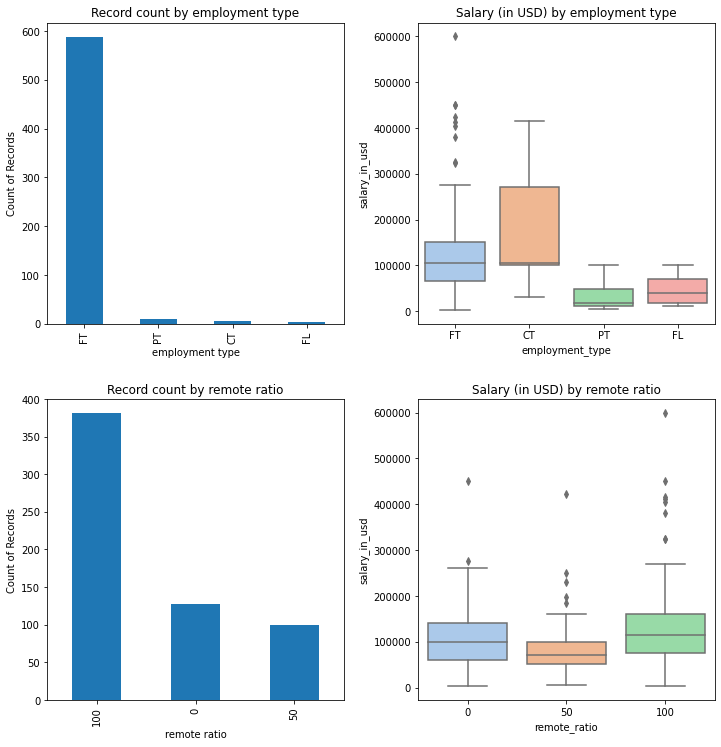

In [210]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)

# Employment Type record count graph
category_counts = sal['employment_type'].value_counts()
# Plotting the count graph
category_counts.plot(kind='bar', ax=axs[0,0])
# Adding labels and title
axs[0,0].set_xlabel('employment type')
axs[0,0].set_ylabel('Count of Records')
axs[0,0].set_title('Record count by employment type')


# Box plot of salary distribution by employment type
sns.boxplot(x='employment_type',y='salary_in_usd',data=sal, palette='pastel', ax = axs[0,1])
axs[0,1].set_title("Salary (in USD) by employment type")


# Remote Ratio record count graph
category_counts = sal['remote_ratio'].value_counts()
# Plotting the count graph
category_counts.plot(kind='bar', ax=axs[1,0])
# Adding labels and title
axs[1,0].set_xlabel('remote ratio')
axs[1,0].set_ylabel('Count of Records')
axs[1,0].set_title('Record count by remote ratio')


# Box plot of salary distribution by remote ratio
sns.boxplot(x='remote_ratio',y='salary_in_usd',data=sal, palette='pastel', ax = axs[1,1])
axs[1,1].set_title("Salary (in USD) by remote ratio")

In [199]:
category_counts = sal['employment_type'].value_counts()
category_counts

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Salary (in USD) by Employment Type & Experience')

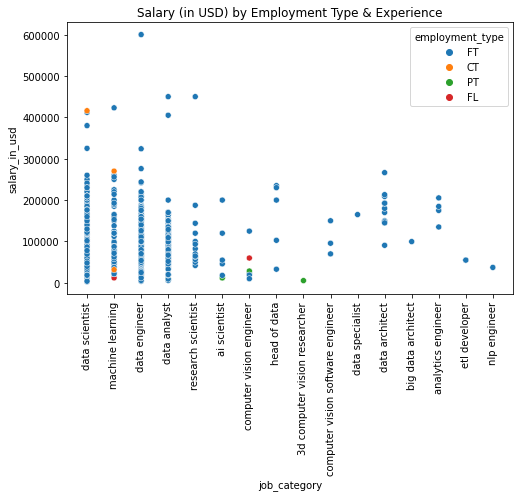

In [216]:
plt.figure(figsize=(8,5))

# Job Category x Experience x Salary
sns.scatterplot(data=sal, x="job_category", y="salary_in_usd", hue="employment_type")
plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees

plt.title("Salary (in USD) by Employment Type & Experience")

6. Work Year

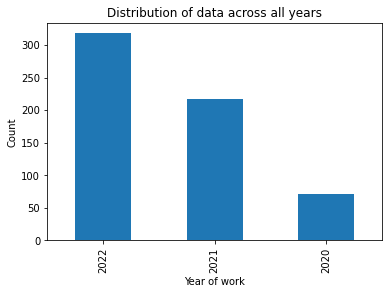

In [68]:
category_counts = sal['work_year'].value_counts()

# Plotting the count graph
category_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Year of work')
plt.ylabel('Count')
plt.title('Distribution of data across all years')

# Display the graph
plt.show()


Text(0.5, 1.0, 'Salary (in USD) by year')

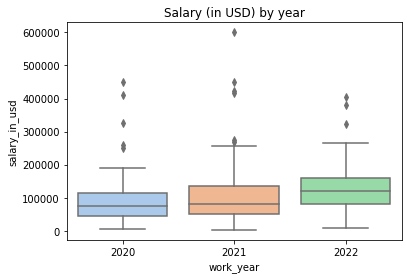

In [79]:
# Box plot of salary distribution by employment type
sns.boxplot(x='work_year',y='salary_in_usd',data=sal, palette='pastel')
plt.title("Salary (in USD) by year")


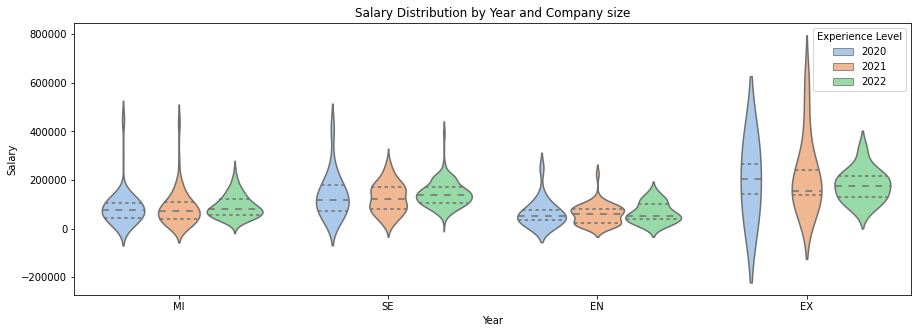

In [80]:
# Create a violin plot
plt.figure(figsize=(15,5))
sns.violinplot(data=sal, x='experience_level', y='salary_in_usd', hue='work_year', inner="quart", palette='pastel')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary Distribution by Year and Company size')
plt.legend(title='Experience Level')
plt.show()

While EX and SE levels saw a higher median salary in 2022 as compared to 2021, MI remained almost the same as 2021 and EN salaries actually decreased

7. Company Size

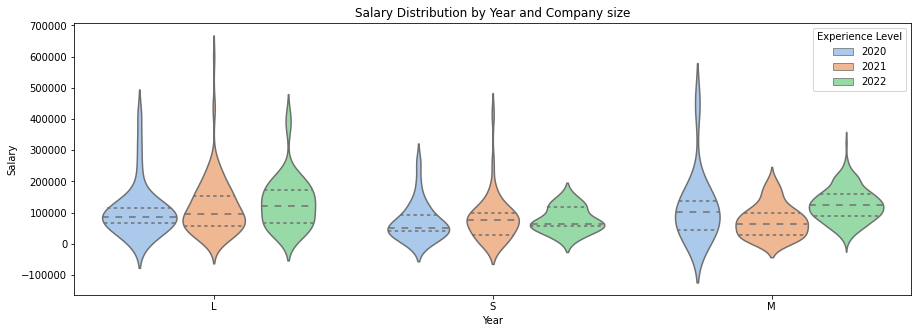

In [81]:
# Create a violin plot
plt.figure(figsize=(15,5))
sns.violinplot(data=sal, x='company_size', y='salary_in_usd', hue='work_year', inner="quart", palette='pastel')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary Distribution by Year and Company size')
plt.legend(title='Experience Level')
plt.show()

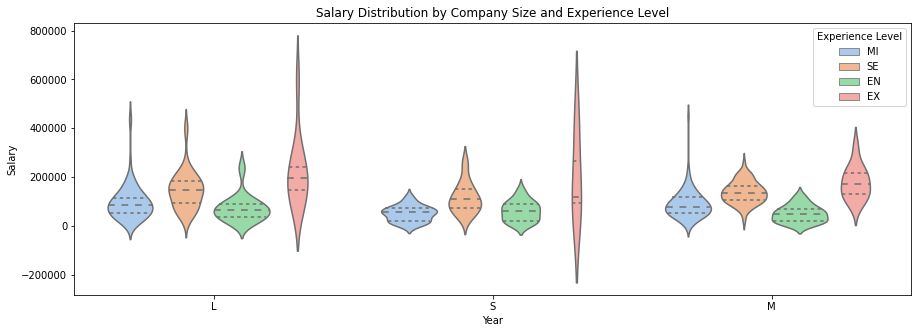

In [82]:
# Create a violin plot
plt.figure(figsize=(15,5))
sns.violinplot(data=sal, x='company_size', y='salary_in_usd', hue='experience_level', inner="quart", palette='pastel')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary Distribution by Company Size and Experience Level')
plt.legend(title='Experience Level')
plt.show()

### EDA Conclusions

**Overall**
1. US is the most pre-dominant employee residence (\~55%) and company location (\~58%) in the data. Full time employees and 100% remote employees are also pre-dominant in the data. This means that the models should make the best predictions for these intersections as they will have the more data and patterns to learn from there.
2. Salary in USD was used as the salry column as it provides a more apple to view when considering 

**Employee Experience**
1. The salary bands are higher for employees with more experience. We can easily observe this in the box plot. The mean and median for higher experience levels are higher as expected.
2. In the charts we also observe some overlap in the salary bands for consecutive experience levels. My hypothesis here is that this overlap probably contains high performing individuals at an experience level or ones who are close to being promoted to the next level.

**Job Title/ Job Category**
1. There were several variations in job title for the same job categories such as Data Science, Data Analytics, Machine Learning and, Data engineering. So I tried to re-engineer the job_title coulmn into categories to help in visualizing them.
2. Meadian salary of DS and DE is over 100K at an overall level.
3. The experience level of employees shows similar trend at job category breakdown as it does at overall level i.e. higher experience levels get higher salaries.

**Locations**
1. Since most locations (employee residence and company location) had very few records, I decided to focus on only those locations in each category with >= 5 records.
2. US has the most records in most category.
3. US seems to have the higher median salary for both categories as compared to other locations. US also offers the highest salaries across all top job categories across all top locations.
4. In terms of employee residence, CA, GB, seem to have similar median salaries following US.
5. We observe highest salaries predominantly for Machine Learning, Data Engineering and Data Scientist experts across all locations. 

## For Scikit Learn - Feature Engineering

### Train & Test split

In [3]:
# Model data starts off as a pristine dataset from the raw data and then we do pre-processing on it
model_data = raw_salaries.copy(deep=True)

# Creating the job category column
# Function to find the pattern and assign corresponding value
def find_pattern(text, patterns):
    text = text.lower()
    for pattern, value in patterns.items():
        match = re.findall(pattern, text)
        if match:
            return value
    return text

job_categories = {
    r'data engineer': 'data engineer',
    r'data analy': 'data analyst',
    r'data scien': 'data scientist',
    r'machine learning': 'machine learning',
    r'ml engineer': 'machine learning'
    
}

# Apply the function to the 'Text' column and assign the results to a new column 'NewColumn'
model_data['job_category'] = model_data['job_title'].apply(find_pattern, patterns=job_categories)

# Removing all columns that aren't needed for training or testing the models
model_data.drop(columns=['Unnamed: 0', 'salary', 'job_title'], inplace = True)

# Creating separate datasets for the independent variables and the dependent variable
X = model_data.drop(columns=['salary_in_usd'])
y = model_data[['salary_in_usd']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Scaling the target variable

The only numeric column that has a wide range and probably needs preprocessing in the form standardization scaling is the salary_in_usd column. 

**Q. Should the target variable be scaled?**

In most cases, scaling is not applied to the target variable. The target variable represents the variable you are trying to predict, and scaling it is generally not necessary or meaningful for most machine learning algorithms.

However in linear regression, it can be beneficial to scale the target variable if it has a wide range of values. Scaling the target variable can help to achieve better convergence during the training process and improve the performance of the linear regression model. When the target variable has a wide range, it may dominate the optimization process, leading to difficulties in finding the optimal coefficients for the features.

So we will first create a strandardization scaler based on the train_y set and then apply it to the train_y and test_y datasets.

**Q. When the target variable is scaled, should the evaluation metrics be calculated on scaled values or original values?**

Evaluation metrics should be calculated on the original values of the target and not the scaled values.

Target variable scaling is done to help training and for improved performance of the model but it doesn't change the fact that what need to predict is the target in its original unscaled form. Calculating evaluation metrics in the original scale ensure that the results are interpreted correctly and the performance is measured in the problem's actual context.

In [4]:
scaler = StandardScaler()

temp = y_train # to check how inverse transformation work

# This way we fit the scaler and transform the Training dataset in one step
y_train = scaler.fit_transform(y_train)

# We transform the test variable using the scaler generated using the target variable
y_test = scaler.transform(y_test)

In [5]:
temp.head()

,salary_in_usd
501,32974
90,88654
527,135000
576,210000
200,61467


In [6]:
# Inverse transformation of target variable to get original values
((y_train * scaler.scale_) + scaler.mean_)[:5]

array([[ 32974.],
       [ 88654.],
       [135000.],
       [210000.],
       [ 61467.]])

### Ordinal columns

This dataset contains some ordinal categorical columns that will need to be encoded in a way that represents the ordinality levels.

**Q. Should "work_year" be considered an integer variable or an ordinal variable?**

- That decision lies in the nature of data and underlying relationship that we want to capture. Does the sequence of moving from 2020 to 2021 to 2022 hold any significance in the data or do the change in years don't change anything. Since in this case, the year independent variable could hold some significance in salary offered due to economic factors, hiring competition, supply and demand in job category, inflation it is important to represent the numeric effect of these years. Thus we should consider them integer for this use case.

**Q. Should "remote_Ratio" be considered integer or ordinal?**
- I will use the same logic for remote_ratio where I will consider it a numeric column instead of ordinal because its values hold actual meaning.

So for this dataset the identified ordinal columns are: experience_level & company_size

In [7]:
ordinal_columns = [ 'experience_level', 'company_size']

# Ordinal categories and their order
experience_categories = ['EN', 'MI', 'SE', 'EX']
company_size_categories = ['S', 'M', 'L']

# Created an instance of OrdinalEncoder with specified category orders
encoder = OrdinalEncoder(categories=[experience_categories, company_size_categories])

# Extract the ordinal columns from X_train
X_train_ordinal = X_train[ordinal_columns]

# Fit and transform the ordinal columns
X_train_encoded = encoder.fit_transform(X_train_ordinal)

# Replace the original columns with the encoded values
X_train_encoded = pd.DataFrame(X_train_encoded, columns=ordinal_columns, index=X_train.index)
X_train[ordinal_columns] = X_train_encoded

<ipython-input-7-d08009052e7a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[ordinal_columns] = X_train_encoded


In [8]:
# Extract the ordinal columns from X_test
X_test_ordinal = X_test[ordinal_columns]

# Transform the ordinal columns in X_test
X_test_encoded = encoder.transform(X_test_ordinal)

# Replace the original columns with the encoded values in X_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ordinal_columns, index=X_test.index)
X_test[ordinal_columns] = X_test_encoded


# # Sample code to inverse transform the encoded values in X_test
# X_test_decoded = encoder.inverse_transform(X_test_encoded)

# # Replace the encoded values with the original categories in X_test
# X_test_decoded = pd.DataFrame(X_test_decoded, columns=ordinal_cols, index=X_test.index)
# X_test[ordinal_cols] = X_test_decoded

# # Check the inverse transformed DataFrame
# print(X_test)

<ipython-input-8-a71248ec843d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[ordinal_columns] = X_test_encoded


In [9]:
# encoder.inverse_transform(X_train_encoded)

### One-hot encoding categorical columns

The categorical columns in this dataset are: employment_type, job_title (or job_category), salary_currency, employee_residence, company_location

We will do one hot encoding for these columns and remove a dummy variable from each variable category to avoid the dummy variable trap.

Resolving some encoding issues in the dataset:

1. Dummy Variable trap: I wanted to have an automated way to get rid of the one extra variable in each categorical column that could create an issue while modeling. 

2. Specifying categorical columns: Use column names that need to be encoded instead of column positions. I achieved this using the list categorical_cols in the code below.<br>

3. Unseen values from test dataset: Some columns (such as salary_currency) had new values in test dataset which meant that they didn't have an encoding as they weren't present in the training dataset. What did we do for this scenario?
   - By using the function below I found a way to have similar structure for train and test datasets and make sure that every value in a categorical column is represented in each dataset (except for the dummy variables and original columns that were expanded)<br>


In [10]:
# This function will make sure that the train and test datasets have the same columns before we drop the required cols
def adding_columns_not_present(df_without_columns, df_with_columns):
    columns_missing = df_with_columns.columns.difference(df_without_columns.columns)
    for column in columns_missing:
        df_without_columns[column] = 0 # Assign new columns values = 0 because they weren't present in this dataset
    return df_without_columns

# This function takes care of OneHotEncoding the categorical columns and creates an easy to understand output
def category_to_column(df, column, prefix='', dummy_variable_list=[]):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [11]:
# All categorical columns
columns_category = ['employment_type', 'salary_currency', 'employee_residence', 'company_location', 'job_category']
# List dummy variables from each category that can be dropped
dummy_variable_list = []

# OneHoteEncoding each categorical column one by one
for column in columns_category:
    X_train = category_to_column(X_train, column, column, dummy_variable_list)
    X_test = category_to_column(X_test, column, column, dummy_variable_list)
    dummy_variable_list.append(X_train.columns[-1])
    
# Making sure the Train and Test datasets have the same structure
X_train = adding_columns_not_present(X_train, X_test)
X_test = adding_columns_not_present(X_test, X_train)

# All columns to drop 
cols_to_drop = columns_category+dummy_variable_list
X_train.drop(columns=cols_to_drop, inplace= True)
X_test.drop(columns=cols_to_drop, inplace= True)

In [12]:
X_train.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')

,work_year,experience_level,remote_ratio,company_size,employment_typeCT,employment_typeFL,employment_typeFT,salary_currencyAUD,salary_currencyBRL,salary_currencyCAD,...,job_categorycomputer vision engineer,job_categorycomputer vision software engineer,job_categorydata analyst,job_categorydata architect,job_categorydata engineer,job_categorydata scientist,job_categoryetl developer,job_categoryhead of data,job_categorymachine learning,job_categorynlp engineer
work_year,1.000000,0.277064,0.064098,-0.114427,-0.087033,-0.055899,0.101729,0.039368,-0.027863,-0.021429,...,-0.062562,-0.009463,0.128085,0.064277,0.002020,-0.057786,0.055732,-0.022179,-0.063824,0.039368
experience_level,0.277064,1.000000,0.049182,0.065400,-0.034270,-0.019269,0.154004,-0.082619,0.034204,0.027296,...,-0.028124,-0.109603,0.025171,0.055845,0.049380,-0.005051,-0.034270,0.097917,-0.055452,-0.024208
remote_ratio,0.064098,0.049182,1.000000,-0.058827,0.046442,-0.018186,-0.010022,-0.023021,-0.078848,0.041168,...,-0.001551,0.056938,0.075970,0.093466,0.037364,-0.089372,-0.111623,0.037815,-0.018538,-0.023021
company_size,-0.114427,0.065400,-0.058827,1.000000,0.031053,-0.026901,0.048956,-0.013409,-0.013409,0.076948,...,-0.093594,-0.105064,-0.043287,0.012146,0.014126,0.060376,-0.018982,0.044006,-0.056334,0.057278
employment_typeCT,-0.087033,-0.034270,0.046442,0.031053,1.000000,-0.005868,-0.387740,-0.002925,-0.002925,-0.011496,...,-0.006568,-0.005077,0.048262,-0.008333,-0.039350,0.023600,-0.004141,-0.005868,-0.021572,-0.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
job_categorydata scientist,-0.057786,-0.005051,-0.089372,0.060376,0.023600,-0.015121,0.034316,0.065086,-0.031744,0.078206,...,-0.071278,-0.055097,-0.349188,-0.090443,-0.427060,1.000000,-0.044940,-0.063686,-0.234123,-0.031744
job_categoryetl developer,0.055732,-0.034270,-0.111623,-0.018982,-0.004141,-0.005868,0.010679,-0.002925,-0.002925,-0.011496,...,-0.006568,-0.005077,-0.032174,-0.008333,-0.039350,-0.044940,1.000000,-0.005868,-0.021572,-0.002925
job_categoryhead of data,-0.022179,0.097917,0.037815,0.044006,-0.005868,-0.008316,0.015134,-0.004145,-0.004145,-0.016291,...,-0.009307,-0.007194,-0.045596,-0.011810,-0.055764,-0.063686,-0.005868,1.000000,-0.030571,-0.004145
job_categorymachine learning,-0.063824,-0.055452,-0.018538,-0.056334,-0.021572,0.045077,0.013276,-0.015238,-0.015238,0.019148,...,-0.034215,-0.026448,-0.167620,-0.043415,-0.205000,-0.234123,-0.021572,-0.030571,1.000000,-0.015238


### Linear model in Scikit Learn

#### Baseline Linear Regression

In [13]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 1.661003496452518
R2 score: -0.21733698410432978


#### Ridge Regression

In [18]:
# Initialize a Ridge regression model
ridge_model = Ridge()

# hyperparameter grid
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 20.0, 50.0]}

# Grid search with cross-validation
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_model = ridge_grid_search.best_estimator_

# Make predictions with the best model
ridge_y_pred = best_ridge_model.predict(X_test)

# Evaluate the best model
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Best alpha:", best_ridge_alpha)
print("Mean squared error:", ridge_mse)
print("R2:",ridge_r2)
print(f"Best model coefficients: {best_ridge_model.coef_}")

Best alpha: 10.0
Mean squared error: 1.3188736536286225
R2: 0.03340740741853021
Best model coefficients: [[-0.06896911  0.40584492  0.00125649  0.18590071 -0.05261148 -0.12585517
   0.13684748  0.03161037 -0.06388964 -0.05658689  0.05313137 -0.05590618
  -0.15572516  0.01997386 -0.13342132  0.09687227 -0.08756978 -0.29928965
  -0.00784981 -0.09044786 -0.09002909  0.05297327 -0.0806282   0.00609935
   0.01622276  0.16547199  0.0107788   0.00506418 -0.03667818 -0.09205703
   0.11873082  0.05313137 -0.05590618 -0.02955449 -0.02924005 -0.01656059
   0.09554987  0.01997386  0.08415082 -0.02788959 -0.01370486 -0.00635752
   0.03777076 -0.04796535  0.0044115  -0.00956664 -0.08756978 -0.00935972
  -0.10181415  0.08142384 -0.0785435  -0.06112193  0.06149091  0.07103779
  -0.03553292 -0.04800677 -0.09044786 -0.04013854 -0.0208684   0.04995995
  -0.0530966  -0.04796013 -0.09002909  0.08510936 -0.12223436 -0.06338138
  -0.05283225 -0.0141901   0.05297327 -0.01336484 -0.0806282  -0.05918226
   0.69

#### Lasso Regression

In [23]:
# Initialize Lasso regression model
lasso = Lasso()

# hyperparameter grid
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 0.25, 1.0, 10.0, 15.0]}

lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model for Lasso regression
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_lasso_model = lasso_grid_search.best_estimator_

# Make predictions with the best model
lasso_y_pred = best_lasso_model.predict(X_test)

# Evaluate the best model
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Best alpha:", best_lasso_alpha)
print("Mean squared error:", lasso_mse)
print("R2:",lasso_r2)
print(f"Best model coefficients: {best_lasso_model.coef_}")

Best alpha: 0.01
Mean squared error: 1.1072502239836364
R2: 0.1885046291643283
Best model coefficients: [-0.03705397  0.40433986  0.00115956  0.15456937 -0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.         -0.04064162  0.06237906 -0.         -0.40047918
  0.         -0.         -0.          0.         -0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.01367982  0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
  0.92612827  0.          0.         -0.          0.          0.
 -0.          0.          0.         -0.   

#### Elastic Net

In [25]:
# Initialize Elastic Net regression model
elastic_net = ElasticNet()

# Hyperparameter grid for Elastic Net regression
elastic_net_param_grid = {'alpha': [0.01, 0.1, 0.25, 1.0, 10.0], 'l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75]}

# Perform grid search with cross-validation for Elastic Net regression
elastic_net_grid_search = GridSearchCV(estimator=elastic_net, param_grid=elastic_net_param_grid, cv=5)
elastic_net_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model for Elastic Net regression
best_elastic_net_alpha = elastic_net_grid_search.best_params_['alpha']
best_elastic_net_l1_ratio = elastic_net_grid_search.best_params_['l1_ratio']
best_elastic_net_model = elastic_net_grid_search.best_estimator_

elastic_net_y_pred = best_elastic_net_model.predict(X_test)

# Evaluate the best model
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_r2 = r2_score(y_test, elastic_net_y_pred)

print(f"Best alpha:{best_elastic_net_alpha}, Best L1 ratio:{best_elastic_net_l1_ratio}")
print("Mean squared error:", elastic_net_mse)
print("R2:",elastic_r2)
print(f"Best model coefficients: {best_elastic_net_model.coef_}")

Best alpha:0.01, Best L1 ratio:0.25
Mean squared error: 1.252485321161951
R2: 0.08206291753473272
Best model coefficients: [-6.99050369e-02  4.08483620e-01  1.19346371e-03  1.69856166e-01
 -0.00000000e+00 -4.69599140e-02  1.12764727e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.27599450e-01  0.00000000e+00 -1.11037670e-01  1.47964158e-01
 -0.00000000e+00 -3.96026059e-01  0.00000000e+00 -2.15943329e-02
 -4.86291255e-03  0.00000000e+00 -5.47887543e-04  0.00000000e+00
  0.00000000e+00  1.63907784e-01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.25268291e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  8.75155547e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.88758994e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.74872457e-02

### Statsmodel Linear Regression

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [21]:
# Model data starts off as a pristine dataset from the raw data and then we do pre-processing on it
model_data = raw_salaries.copy(deep=True)

# Creating the job category column
# Function to find the pattern and assign corresponding value
def find_pattern(text, patterns):
    text = text.lower()
    for pattern, value in patterns.items():
        match = re.findall(pattern, text)
        if match:
            return value
    return text

job_categories = {
    r'data engineer': 'data engineer',
    r'data analy': 'data analyst',
    r'data scien': 'data scientist',
    r'machine learning': 'machine learning',
    r'ml engineer': 'machine learning'
    
}

# Apply the function to the 'Text' column and assign the results to a new column 'NewColumn'
model_data['job_category'] = model_data['job_title'].apply(find_pattern, patterns=job_categories)

# Removing all columns that aren't needed for training or testing the models
model_data.drop(columns=['Unnamed: 0', 'salary', 'job_title'], inplace = True)

# Creating separate datasets for the independent variables and the dependent variable
X = model_data.drop(columns=['salary_in_usd'])
y = model_data[['salary_in_usd']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


######### Treating Ordinal independent variables #########
ordinal_columns = [ 'experience_level', 'company_size']

# Ordinal categories and their order
experience_categories = ['EN', 'MI', 'SE', 'EX']
company_size_categories = ['S', 'M', 'L']

# Created an instance of OrdinalEncoder with specified category orders
encoder = OrdinalEncoder(categories=[experience_categories, company_size_categories])

# Extract the ordinal columns from X_train
X_train_ordinal = X_train[ordinal_columns]
# Fit and transform the ordinal columns
X_train_encoded = encoder.fit_transform(X_train_ordinal)
# Replace the original columns with the encoded values
X_train_encoded = pd.DataFrame(X_train_encoded, columns=ordinal_columns, index=X_train.index)
X_train[ordinal_columns] = X_train_encoded

# Extract the ordinal columns from X_test
X_test_ordinal = X_test[ordinal_columns]
# Transform the ordinal columns in X_test
X_test_encoded = encoder.transform(X_test_ordinal)
# Replace the original columns with the encoded values in X_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ordinal_columns, index=X_test.index)
X_test[ordinal_columns] = X_test_encoded


######### Constant term addition to X_train and X_test #########
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

<ipython-input-21-d1427a7567cb>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[ordinal_columns] = X_train_encoded
<ipython-input-21-d1427a7567cb>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[ordinal_columns] = X_test_encoded


In [22]:
# Creating dataset that is appropriate for Training and Testing by Statsmodel's Ordinary Least Squares model
model_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)

model_data.head()

,work_year,experience_level,employment_type,salary_currency,employee_residence,remote_ratio,company_location,company_size,job_category,salary_in_usd
501,2022,1.0,FT,EUR,EE,100,EE,0.0,head of data,32974
90,2021,2.0,FT,EUR,GR,100,DK,2.0,data analyst,88654
527,2022,2.0,FT,USD,US,100,US,1.0,data analyst,135000
576,2022,2.0,FT,USD,US,100,US,1.0,data scientist,210000
200,2021,1.0,FT,EUR,DE,50,AT,1.0,data scientist,61467


In [23]:
# Now I want to create the X and y dataframes that can be fed into OLS model
y_train2, X_train2 = dmatrices('salary_in_usd ~ work_year + experience_level + employment_type + salary_currency + employee_residence + remote_ratio + company_location + company_size + job_category'
                 , data=model_data, return_type='dataframe')

y_test2, X_test2 = dmatrices('salary_in_usd ~ work_year + experience_level + employment_type + salary_currency + employee_residence + remote_ratio + company_location + company_size + job_category'
                 , data=test_data, return_type='dataframe')

# Making sure that X_train and X_test have the same shape by taking care of missing categories missing in each dataset in 
# This function will make sure that the train and test datasets have the same columns before we drop the required cols
def adding_columns_not_present(df_without_columns, df_with_columns):
    columns_missing = df_with_columns.columns.difference(df_without_columns.columns)
    for column in columns_missing:
        df_without_columns[column] = 0 # Assign new columns values = 0 because they weren't present in this dataset
    return df_without_columns


X_train2 = adding_columns_not_present(X_train2, X_test2)
X_test2 = adding_columns_not_present(X_test2, X_train2)


In [24]:
# Fit the linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train2, X_train2).fit(conf_int=0.1)


# Print the summary of the regression results
print(model.summary(alpha=0.1))


# print(model.conf_int(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     5.394
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           7.50e-34
Time:                        17:14:45   Log-Likelihood:                -5871.6
No. Observations:                 485   AIC:                         1.195e+04
Df Residuals:                     382   BIC:                         1.238e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|       [0.05       0.95]
--------------------------------------------------------------------------------------------

Q. What is the significance level we are accepting for this problem statement?

- I am choosing p-value < 0.1 (10%) to reject the null hypothesis of no association between the independent variable and a dependent variable.

Q. What the independent variables that have a statistically significant effect on the dependent variable using the results from the Linear Reg model above.

- company_size, experience_level, work_year, company_location=AU, employee_residence=US, employee_residence=GR, employee_residence=AU

Q. For work_year, the p-value < 0.1 but the confidence interval (0.025 to 0.975) contains 0. How do we interpret this?

- Even though the 95% confidence interval contains 0, the p-value is statistically significant and the coefficient is very high. This in a way shows that this metric has a statistically significant effect on the output variable.
Also, the confidence interval that was showing for 95% confidence didn't apply to this scenario as we had chosen a significance level of 0.1. That is why the above code was modified with alpha =0.1 to get the new CI. Now the CI for coefficient of work_year does not contain 0 that means that work_year will most likely have a non-zero coefficient while predicting salary.

**Interpretation when p-value is statistically signifant relationship but the confidence interval contains zero**<br>
When you encounter a situation where the p-value is significant (i.e., below a predetermined threshold, such as 0.05) but the confidence interval includes zero, it indicates a potential inconsistency in the interpretation of the results. Here are a few considerations and possible steps to take in such cases:

   1. Evaluate the magnitude of the effect: Even if the confidence interval contains zero, it's important to assess the magnitude of the effect size. If the point estimate (e.g., the coefficient) is relatively large and the interval is narrow, it suggests that the effect is still practically significant, despite including zero in the interval.
    
   2. Review the assumptions and limitations of the analysis: Confirm that the assumptions underlying the statistical test or model are met. Assess the robustness of the results by conducting sensitivity analyses or exploring alternative models.

   3. Consider the sample size: A larger sample size generally leads to narrower confidence intervals. If the sample size is relatively small, the confidence interval may be wider and include zero, even when the effect is truly non-zero.

   4. Conduct further analyses or experiments: If the p-value is significant and the confidence interval contains zero, it may be worthwhile to conduct additional analyses or experiments to gather more evidence. This could involve collecting more data, exploring different modeling approaches, or performing additional hypothesis tests.

   5. Seek expert advice: If you are uncertain about the appropriate interpretation of the results, it can be helpful to consult with a subject matter expert or a statistician who can provide guidance based on the specific context and research question.

Statistical significance (as indicated by the p-value) and practical significance (as indicated by the effect size and confidence interval) are not always aligned. It's important to consider both aspects and interpret the results in light of the specific research question and practical implications.

#### Predicting on test set for evaluation

In [26]:
stats_y_pred = model.predict(X_test2)

# Model Evaluation
stats_mse = mean_squared_error(y_test, stats_y_pred)
stats_r2 = r2_score(y_test, stats_y_pred)

print("Mean squared error:", stats_mse)
print("R2 score:", stats_r2)

Mean squared error: 1.858971893745436e+16
R2 score: -2909180.367057582
